In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE=(224,224)

In [3]:
import pathlib
data_dir=pathlib.Path("/home/sanjana/Desktop/medical_imaging/cervical-cancer")
data_dir

PosixPath('/home/sanjana/Desktop/medical_imaging/cervical-cancer')

In [4]:
image_count=len(list(data_dir.glob('*/*jpg')))
image_count

962

In [5]:
lesions_dict={
    'NILM': list(data_dir.glob('NILM/*')),
    'LSIL': list(data_dir.glob('LSIL/*')),
    'HSIL': list(data_dir.glob('HSIL/*')),
    'SCC': list(data_dir.glob('SCC/*')),
}

In [6]:
lesions_labels={
    'NILM': 0,
    'LSIL': 1,
    'HSIL': 2,
    'SCC': 3,
}

In [7]:
x, y=[],[]
for lesions_name, images in lesions_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        x.append(img)
        y.append(lesions_labels[lesions_name])

In [8]:
x=np.array(x)
y=np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [10]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

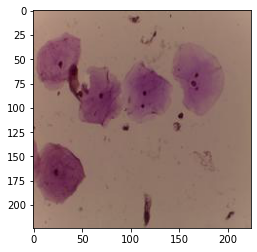

In [11]:
plt.imshow(x[0])

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(4, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [16]:
vgghist = model.fit(x_train_scaled,y_train, steps_per_epoch = 103, epochs = 10)

Train on 721 samples
Epoch 1/10
721/721 [==============================] - 114s 159ms/sample - loss: 0.8054 - acc: 0.6990
Epoch 2/10
721/721 [==============================] - 116s 160ms/sample - loss: 0.5169 - acc: 0.7767
Epoch 3/10
721/721 [==============================] - 116s 161ms/sample - loss: 0.3410 - acc: 0.8544
Epoch 4/10
721/721 [==============================] - 129s 178ms/sample - loss: 0.2537 - acc: 0.9126
Epoch 5/10
721/721 [==============================] - 137s 190ms/sample - loss: 0.1924 - acc: 0.9237
Epoch 6/10
721/721 [==============================] - 136s 189ms/sample - loss: 0.1585 - acc: 0.9404
Epoch 7/10
721/721 [==============================] - 134s 186ms/sample - loss: 0.1115 - acc: 0.9556
Epoch 8/10
721/721 [==============================] - 139s 193ms/sample - loss: 0.0952 - acc: 0.9667
Epoch 9/10
721/721 [==============================] - 136s 188ms/sample - loss: 0.0908 - acc: 0.9612
Epoch 10/10
721/721 [==============================] - 137s 191ms/samp

In [17]:
model.evaluate(x_test_scaled, y_test)

241/241 [==============================] - 34s 142ms/sample - loss: 0.2165 - acc: 0.9295


[0.2164565097246922, 0.9294606]